In [1]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
from structgeo.model import geo
from structgeo.model import plot as geovis
from structgeo.model import history as geohistory
import structgeo.probability as rv

import pyvista as pv
# Static plots:
pv.set_jupyter_backend('client')
# Dynamic plots:
# pv.set_jupyter_backend('trame')
# pv.set_jupyter_backend('html')


In [2]:
# Cubic model
bounds = (-10, 10)
resolution = 128
model = geo.GeoModel(bounds=bounds, resolution=resolution)

# Alternatively, you can specify different bounds for each axis
bounds = ((-20, 20), (-20, 20), (-10, 10))
model = geo.GeoModel(bounds=bounds, resolution=resolution)

window_size = (600,400)

To control the thickness of each layer, a generator function can be passed. The generator function should be a callable with no argument that returns a float. The generator will be called for each layer to determine the thickness of that layer.

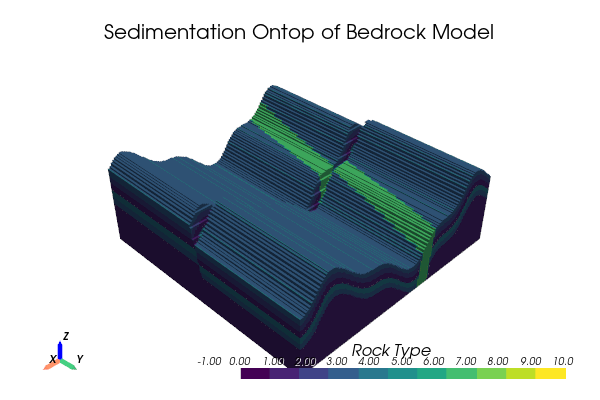

In [3]:

reload(geo)
reload(geovis)

# Bedrock forms the basement layer of the model.  
bedrock = geo.Bedrock(base=-5, value=1)

# Sedimentation is a layer of sedimentary rock that is deposited until reaching a fixed height.
# Sedimentation takes a list of values that represent different types of sedimentary rocks.
# The thickness of eac
sediment0 = geo.Sedimentation(height=0, 
                              value_list=range(1, 5), 
                              )

dike  = geo.Dike(strike=10, dip=80, width=3, origin=(-6, 8, 0), value=7)
tilt = geo.Tilt(strike=0, dip=-10, origin=(0,0,0))
fold = geo.Fold(strike=0, dip=80, rake=0, origin=(0, 0, 0), amplitude=4, period=30, shape=.3)
fault = geo.Fault(strike=90, dip=80, rake=5, amplitude=1.2, origin=(0, 0, 0))

history = [bedrock, sediment0, dike, fold, fault]

model.clear_history()
model.add_history(history)
model.compute_model()
p = geovis.volview(model)
p.window_size = window_size
p.add_title(title='Sedimentation Ontop of Bedrock Model', font_size=8)
p.show(jupyter_backend='static')

In [4]:
rand = rv.NonRepeatingRandomListSelector(range(0,4))

for i in range(5):
    print(next(rand))
    


1
3
1
0
1


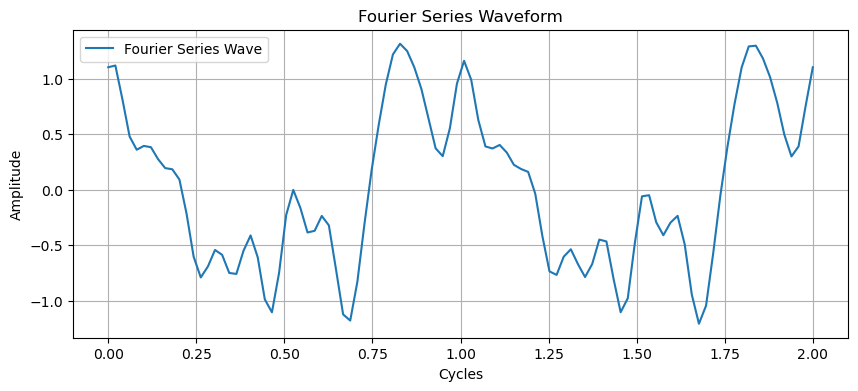

In [63]:
rv = reload(rv)
wave_func= rv.fourier_series_wave(num_harmonics=10)

# Create an array of x-values
x = np.linspace(0, 2, 100)  # From 0 to 10 with 1000 points
y = wave_func(x)  # Evaluate the wave function

plt.figure(figsize=(10, 4))  # Optional: Specify the figure size
plt.plot(x, y, label='Fourier Series Wave')
plt.title('Fourier Series Waveform')
plt.xlabel('Cycles')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
